In [2]:
#!pip install pmdarima

In [62]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense ,Dropout
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product
import statsmodels.api as sm
from keras.utils import plot_model


from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor , AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier,XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeClassifier, RidgeClassifierCV
from sklearn.metrics import mean_squared_error

In [66]:
d = pd.read_csv('/content/upload_DJIA_table.csv')
d

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609


In [67]:
d['Date'] = pd.to_datetime(d['Date'])
d.set_index('Date',inplace=True)

In [7]:
d.describe().T.apply(lambda x: x.apply("{0:.3f}".format))

,count,mean,std,min,25%,50%,75%,max
Open,1989.000,13459.116,3143.282,6547.010,10907.340,13022.050,16477.699,18315.061
High,1989.000,13541.303,3136.272,6709.610,11000.980,13088.110,16550.070,18351.359
Low,1989.000,13372.932,3150.421,6469.950,10824.760,12953.130,16392.770,18272.561
Close,1989.000,13463.032,3144.007,6547.050,10913.380,13025.580,16478.410,18312.391
Volume,1989.000,162810970.337,93923426.676,8410000.000,100000000.000,135170000.000,192600000.000,674920000.000
Adj Close,1989.000,13463.032,3144.007,6547.050,10913.380,13025.580,16478.410,18312.391


In [8]:
def check(d):
    l=[]
    columns=d.columns
    for col in columns:
        dtypes=d[col].dtypes
        nunique=d[col].nunique()
        sum_null=d[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    d_check=pd.DataFrame(l)
    d_check.columns=['column','dtypes','nunique','sum_null']
    return d_check
check(d)

,column,dtypes,nunique,sum_null
0,Open,float64,1980,0
1,High,float64,1983,0
2,Low,float64,1980,0
3,Close,float64,1978,0
4,Volume,int64,1897,0
5,Adj Close,float64,1978,0


<Axes: title={'center': 'DJIA Table'}, xlabel='Date'>

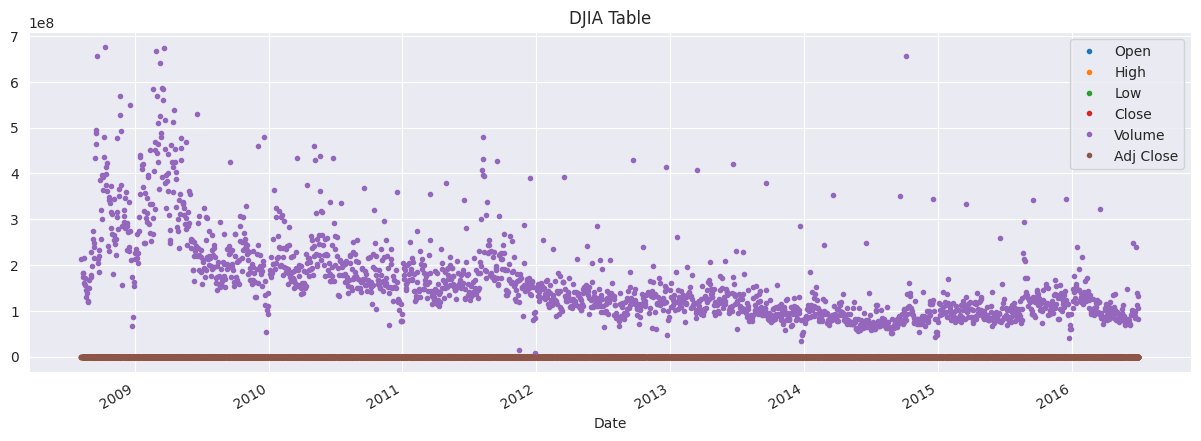

In [9]:
d.plot(figsize=(15,5),style='.',title='DJIA Table')

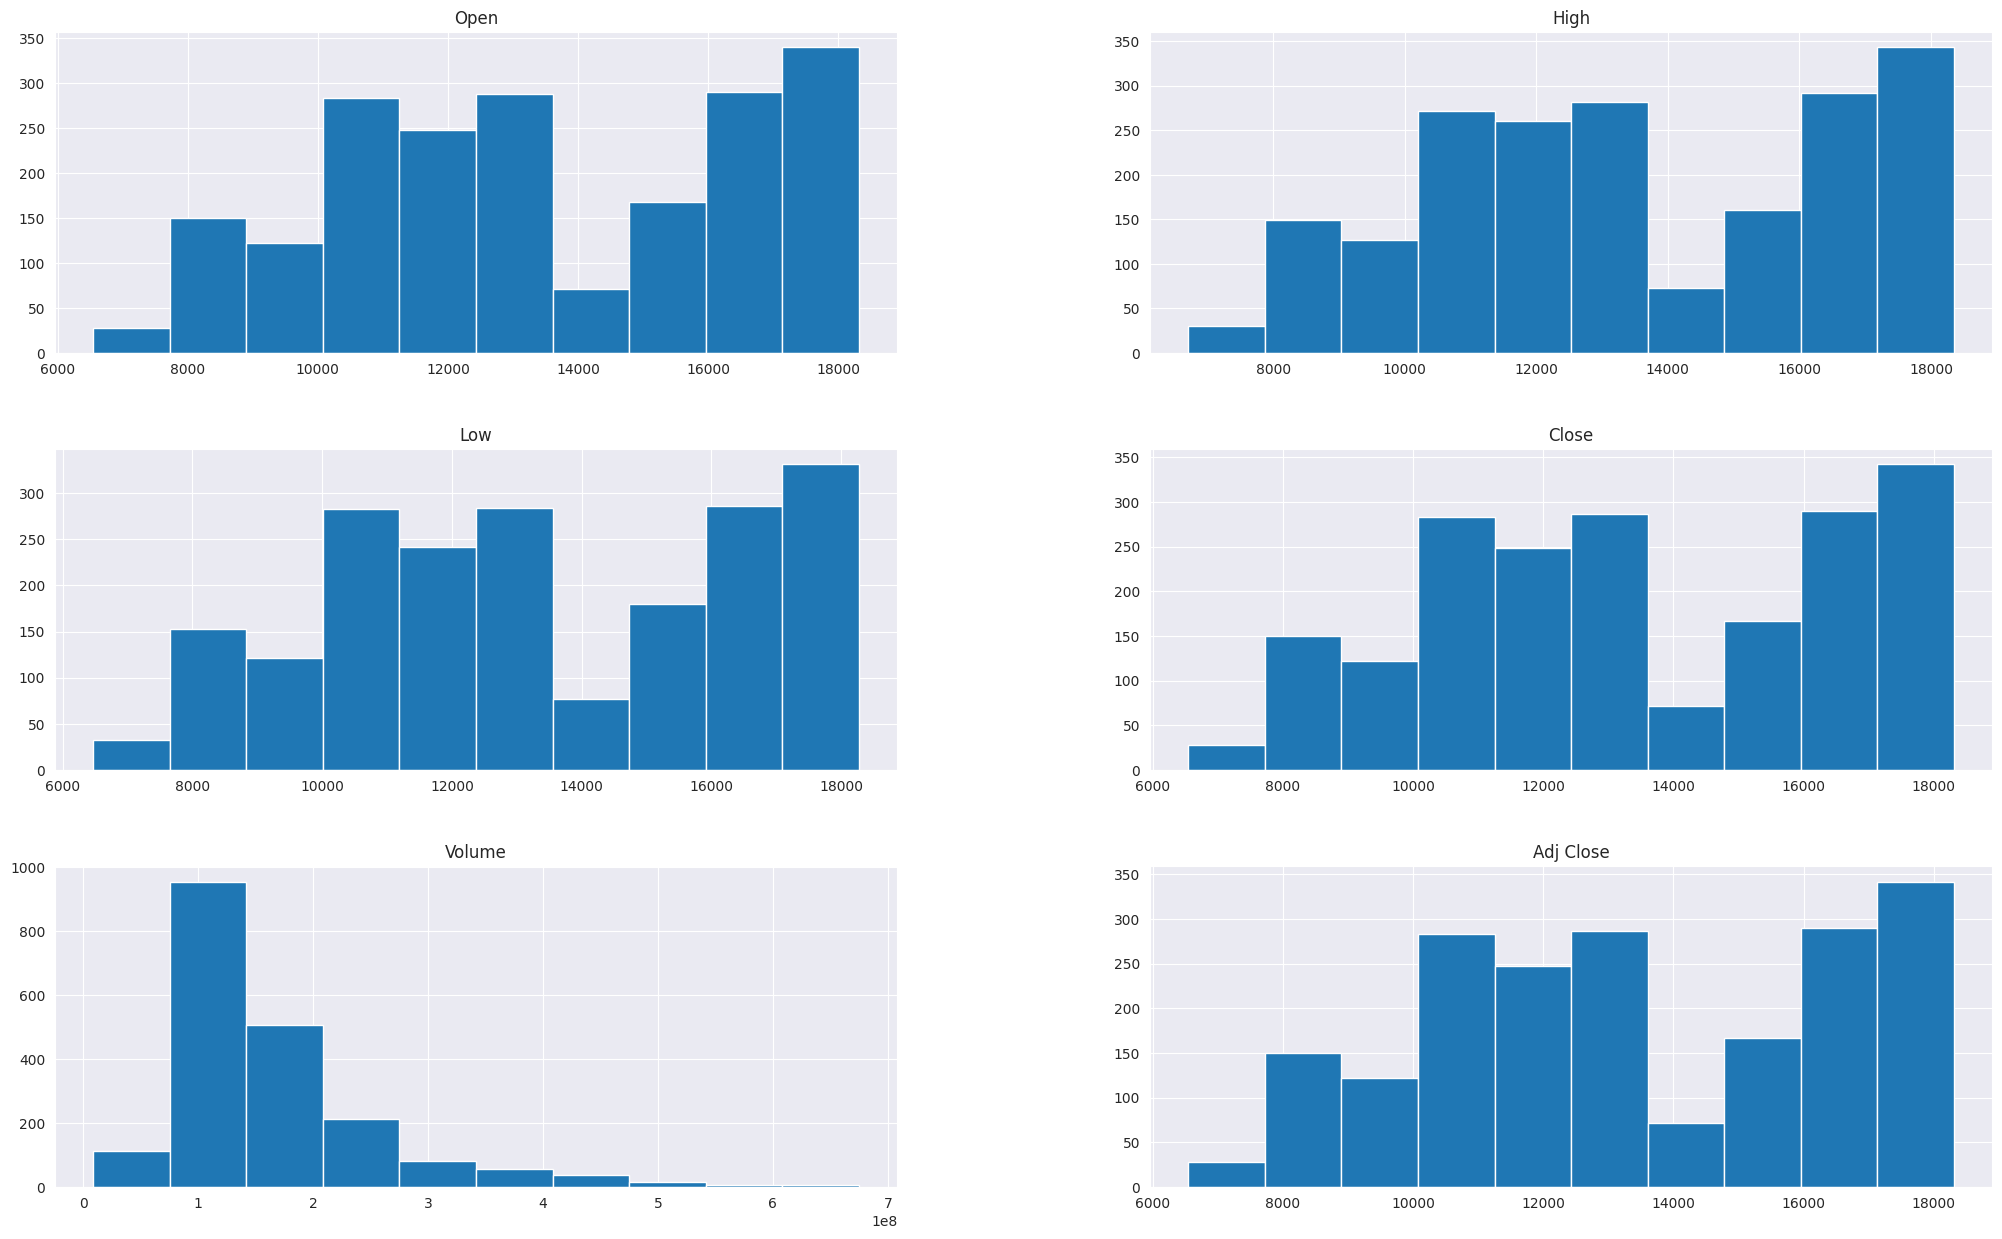

In [10]:
d.hist(figsize=(25,15))
plt.show()

Text(0.5, 1.0, 'DJIA Table')

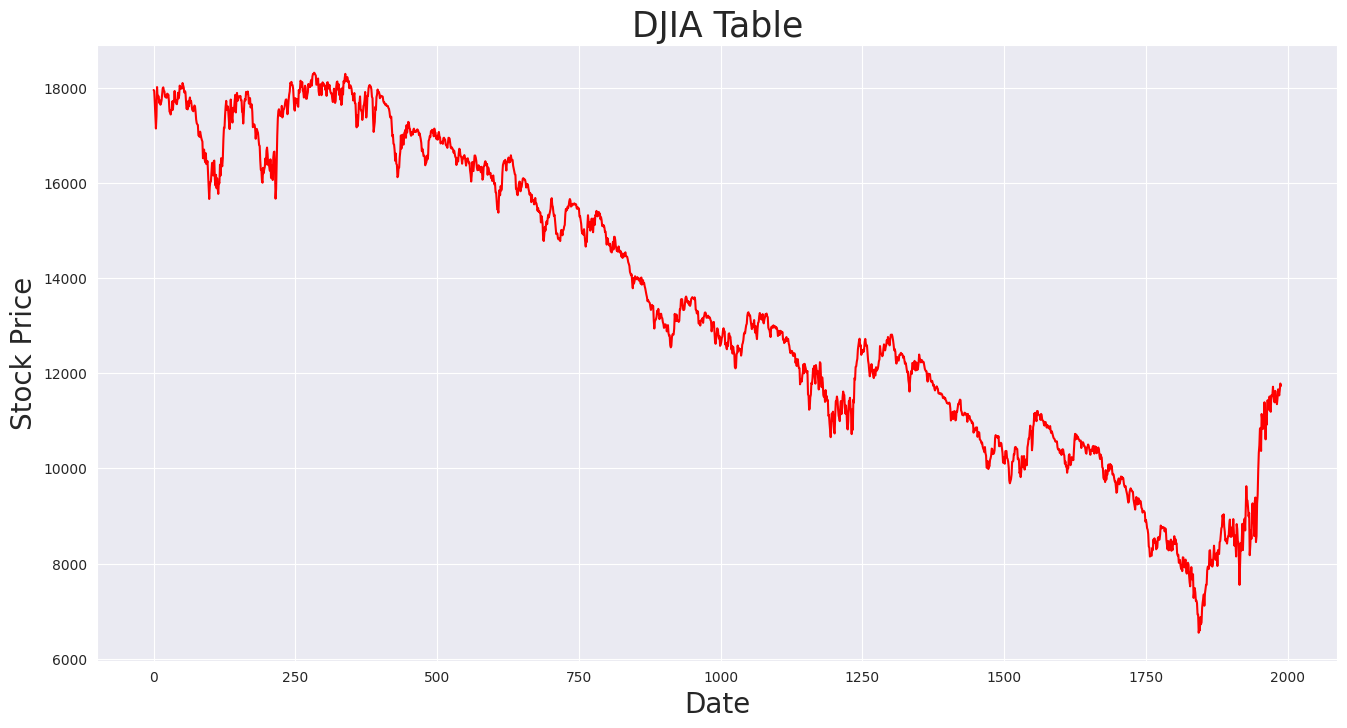

In [12]:
plt.figure(figsize=(16,8))
plt.plot(gs['Close'], label='Close Price history',color='r')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('DJIA Table',size=25)

In [13]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Ohlc(x=d.index, open=d["Open"], high=d["High"], low=d["Low"], close=d["Close"]))
fig.update(layout_xaxis_rangeslider_visible=False)
fig.update_layout(title_text="DJIA", title_x=0.5)
fig.show()

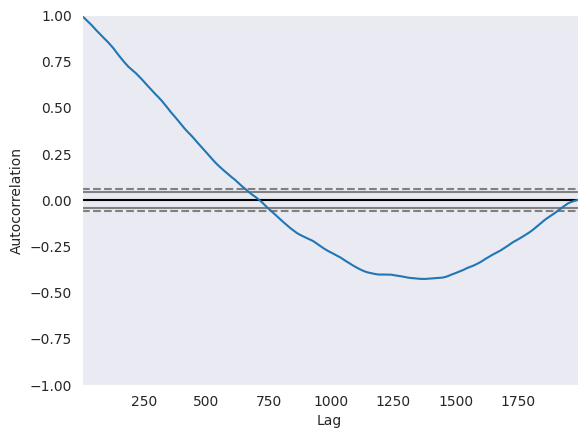

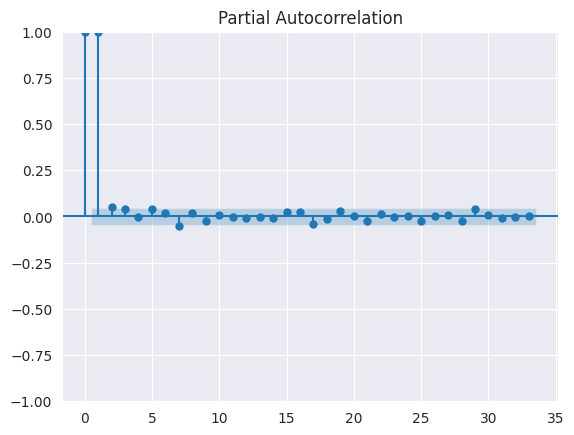

In [14]:
autocorrelation_plot(d['Close'])
plot_pacf(d['Close'])
plt.show()

In [15]:
def ad_test(dataset):
    dtest = adfuller(dataset, autolag = 'AIC')
    print('ADF:', dtest[0])
    print('P-value:', dtest[1])
    print('No. of lags:', dtest[2])
    print('Observation:', dtest[3])
    print('Critical values:')
    for key, val in dtest[4].items():
        print('\t', key, ':', val)
ad_test(d['Close'])

ADF: -1.2267577854116993
P-value: 0.6619805931301699
No. of lags: 5
Observation: 1983
Critical values:
	 1% : -3.4336519592295947
	 5% : -2.862998620943585
	 10% : -2.567546508593341


In [16]:
data = d['Close']
length = int(len(d['Close']) * 0.90)
print('Length:', length)
print('Data length:',len(data))
train = data.iloc[:length]
print('training shape',train.shape)
test = data.iloc[length:]
print('testing shape',test.shape)

Length: 1790
Data length: 1989
training shape (1790,)
testing shape (199,)


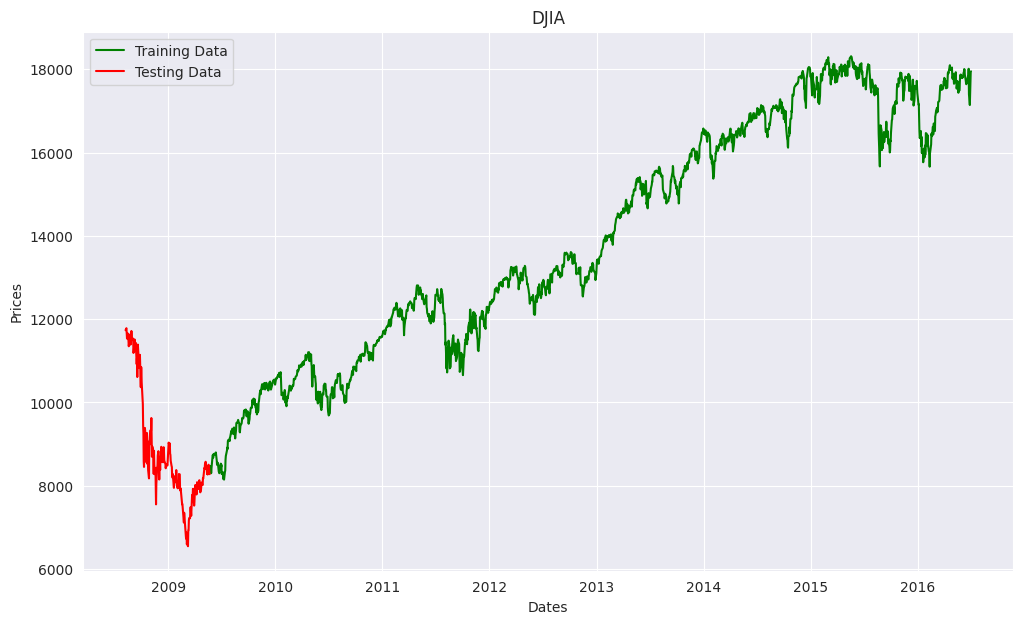

In [17]:
plt.figure(figsize=(12,7))
plt.title('DJIA')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train, 'g', label='Training Data')
plt.plot(test, 'r', label='Testing Data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=39326.687, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.60 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=22407.790, Time=0.63 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=22408.363, Time=0.88 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=22409.401, Time=0.79 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=34618.429, Time=2.25 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.51 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=22410.347, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=22407.180, Time=0.67 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=31204.860, Time=0.65 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=22408.052, Time=1.69 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=22408.883, Time=2.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3

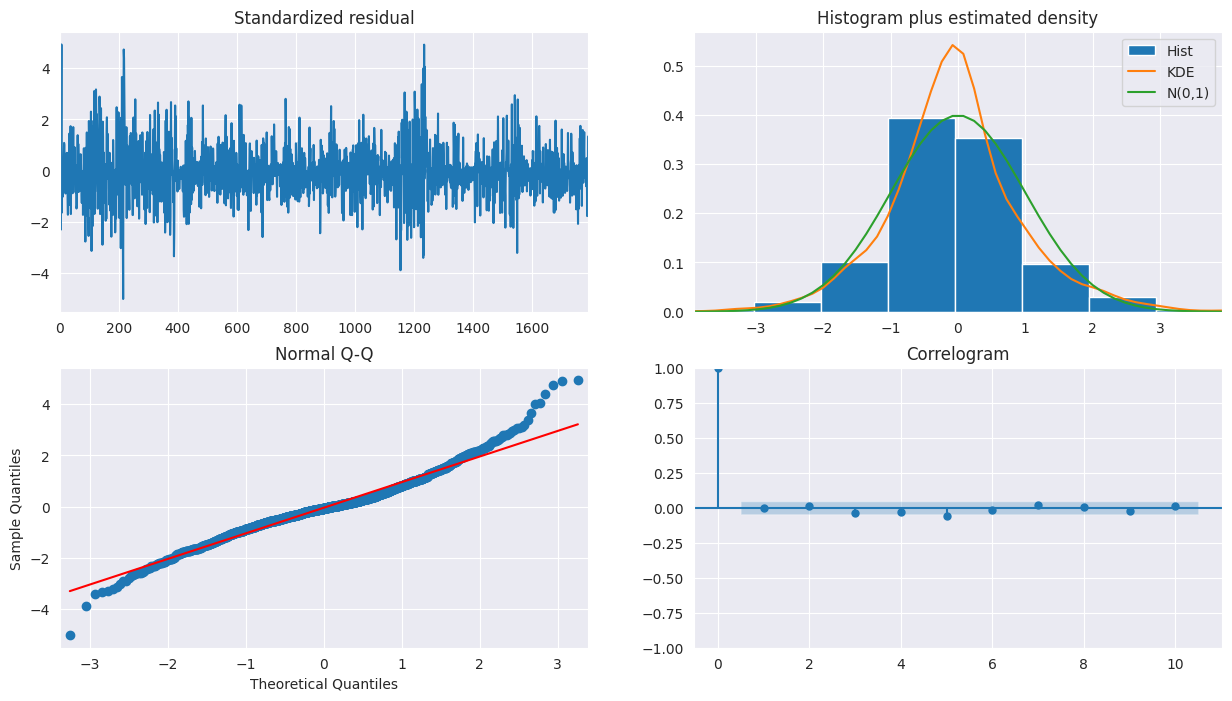

In [18]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(train, start_p=0, start_q=0,
                      test='adf',
                      max_p=3, max_q=3,
                      m=1,
                      d=None,
                      seasonal=False,
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [19]:
import statsmodels.api as sm
pred_start = test.index[0]
pred_end = test.index[-1]
model = sm.tsa.statespace.SARIMAX(data,order=(1,1,1))
model_fit = model.fit()
pred = model_fit.predict(start= pred_start , end = pred_end)
pred

Date
2009-05-22     8470.145242
2009-05-21     8290.313296
2009-05-20     8298.326347
2009-05-19     8415.678528
2009-05-18     8467.260805
                  ...     
2008-08-14    11643.172675
2008-08-13    11609.840819
2008-08-12    11535.822156
2008-08-11    11635.777004
2008-08-08    11767.970864
Name: predicted_mean, Length: 199, dtype: float64

<Axes: xlabel='Date'>

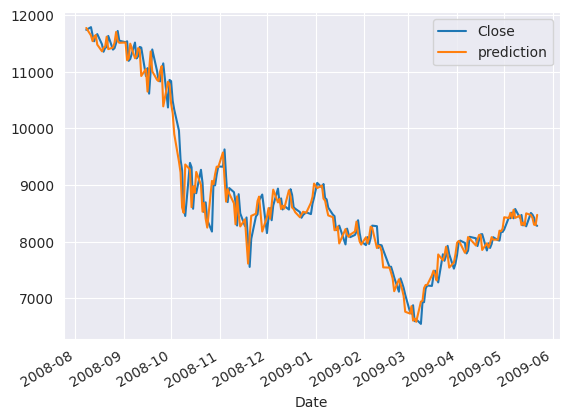

In [20]:
d_sarimax = pd.DataFrame(test)
d_sarimax["prediction"] = pd.Series(pred,index=test.index)
d_sarimax.plot()

In [74]:
d2 = pd.read_csv('/content/upload_DJIA_table.csv')
d_copy=d2.copy()

In [75]:
import math
data = d_copy.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.8)  # number of rows to train the model on
training_data_len

1592

In [76]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.96914484],
       [0.96749772],
       [0.9474974 ],
       ...,
       [0.43308732],
       [0.44497647],
       [0.4408942 ]])

In [77]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.96914484, 0.96749772, 0.9474974 , 0.9232772 , 0.90037259,
       0.92251473, 0.97438916, 0.95481979, 0.9589761 , 0.956863  ,
       0.94583833, 0.95076292, 0.94286432, 0.94580945, 0.9507103 ,
       0.96200273, 0.9721894 , 0.97387752, 0.96820225, 0.96667665,
       0.95704926, 0.95972662, 0.95557114, 0.95536114, 0.96267257,
       0.95885359, 0.96082724, 0.94846389, 0.93034958, 0.93103037,
       0.92545985, 0.93321303, 0.93349873, 0.94885999, 0.93395259,
       0.94969201, 0.94889468, 0.96735828, 0.94845194, 0.95140304,
       0.94461022, 0.94380691, 0.95227674, 0.96419734, 0.95420872,
       0.95906359, 0.97697986, 0.9726255 , 0.97151375, 0.97376696,
       0.97196247, 0.9816307 , 0.97800395, 0.97380182, 0.96473288,
       0.96719509, 0.96565239, 0.94975576, 0.93574513, 0.93749185])]
[0.9345170107022874]

[array([0.96914484, 0.96749772, 0.9474974 , 0.9232772 , 0.90037259,
       0.92251473, 0.97438916, 0.95481979, 0.9589761 , 0.956863  ,
       0.94583833, 0.95076292, 0.942

In [78]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Dense(1))

# Compile the model
model.compile(loss='binary_crossentropy',optimizer='Adam')

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
48/48 [==============================] - 10s 129ms/step - loss: 0.9872
Epoch 2/50
48/48 [==============================] - 6s 117ms/step - loss: 0.6902
Epoch 3/50
48/48 [==============================] - 8s 158ms/step - loss: 0.5682
Epoch 4/50
48/48 [==============================] - 5s 110ms/step - loss: 0.5565
Epoch 5/50
48/48 [==============================] - 6s 123ms/step - loss: 0.5561
Epoch 6/50
48/48 [==============================] - 6s 130ms/step - loss: 0.5551
Epoch 7/50
48/48 [==============================] - 5s 114ms/step - loss: 0.5507
Epoch 8/50
48/48 [==============================] - 7s 137ms/step - loss: 0.5491
Epoch 9/50
48/48 [==============================] - 5s 110ms/step - loss: 0.5479
Epoch 10/50
48/48 [==============================] - 6s 135ms/step - loss: 0.5560
Epoch 11/50
48/48 [==============================] - 5s 114ms/step - loss: 0.7084
Epoch 12/50
48/48 [==============================] - 7s 138ms/step - loss: 0.5641
Epoch 13/50
48/48 [=====

In [79]:
from sklearn.metrics import mean_absolute_error


test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("RMSE: {:.4f}".format(rmse))
print("MAE: {:.4f}".format(mae))
print("MSE: {:.4f}".format(mse))
print("R2 Score: {:.4f}".format(r2))

13/13 [==============================] - 1s 38ms/step
RMSE: 1097.5174
MAE: 1021.9076
MSE: 1204544.5078
R2 Score: 0.1147


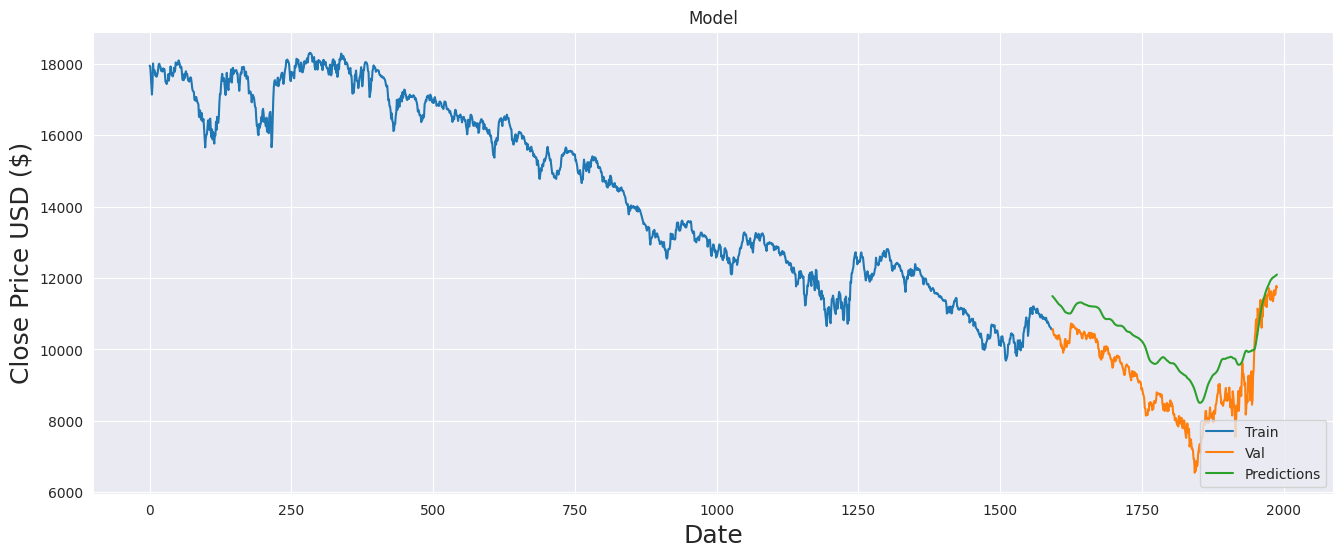

In [80]:
train = data[:training_data_len]
val = data[training_data_len:]
val['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(val[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [81]:
val

,Close,Predictions
1592,10552.519531,11496.790039
1593,10566.200195,11478.530273
1594,10444.139648,11461.229492
1595,10396.759766,11442.303711
1596,10405.980469,11421.379883
...,...,...
1984,11615.929688,12043.598633
1985,11532.959961,12056.841797
1986,11642.469727,12068.826172
1987,11782.349609,12081.671875


loss at epoch 1: 0.9871748089790344
loss at epoch 10: 0.549115002155304


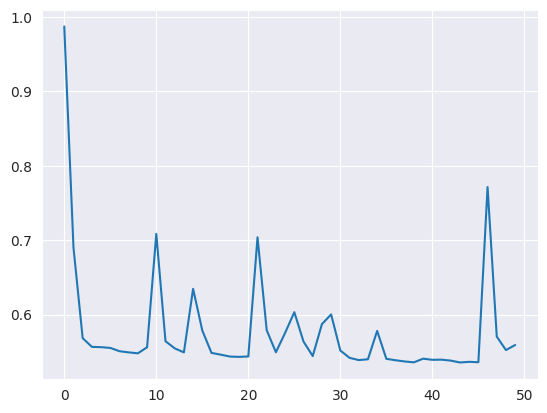

In [82]:
print(f"loss at epoch 1: {history.history['loss'][0]}")
print(f"loss at epoch 10: {history.history['loss'][7]}")
plt.plot(history.history['loss'])

In [83]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

13/13 [==============================] - 1s 43ms/step


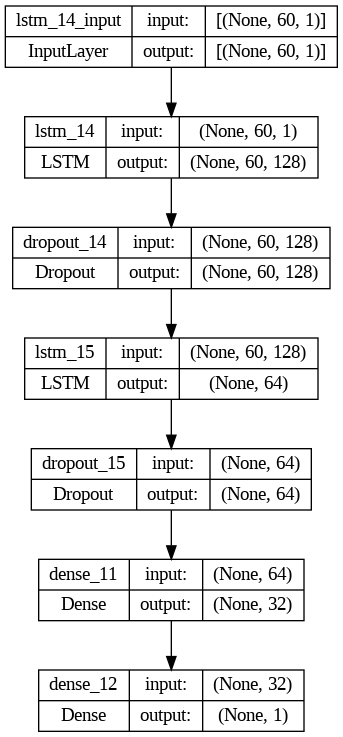

In [84]:
plot_model(model, to_file='DJIA Table.png', show_shapes=True, show_layer_names=True)

In [68]:
x = d.drop("Adj Close", axis=1)
y = d['Adj Close']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training Data Shape : ", x_train.shape, y_train.shape)
print("Test Data Shape : ", x_test.shape, y_test.shape)

Training Data Shape :  (1591, 5) (1591,)
Test Data Shape :  (398, 5) (398,)


In [70]:
model_params = {
    'linear_regression':{
        'model':LinearRegression(),
        'params':{

        }
    },
    'Decision_Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'max_depth':[10,20,50,100],
            'random_state':[0,42]
        }
    },
    'Random_Forest':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators':[10,20,50,100,200]
        }
    },
    'Ridge_regression':{
        'model':Ridge(tol=0.1),
        'params':{
             'alpha':[1,10,20,50,100],
            'max_iter':[50,100,200]
        }
    },
    'Lasso_regression':{
        'model':Lasso(tol=0.1),
        'params':{
            'alpha':[1,10,20,50,100],
            'max_iter':[50,100,200]
        }
    },
    'XGBRegressor':{
        'model':XGBRegressor(),
        'params':{
            'n_estimator':[1000],
            'early_stopping_round':[50]
        }
    }




}

In [71]:
score=[]
best_score = 0
second_best_score = 0
best_model = None        # This is the best model in the end of the grid search cv
second_best_model = None #This is the second best model in the end of the grid search cv
for model_name,m in model_params.items():
    clf = GridSearchCV(m['model'],m['params'],cv=5)
    clf.fit(x_train,y_train)

    if best_score<clf.best_score_:
        second_best_score =  best_score
        second_best_model =  best_model
        best_score = clf.best_score_
        best_model = clf.best_estimator_
    elif clf.best_score_>second_best_score:
        second_best_score = clf.best_score_
        second_best_model = clf.best_estimator_

    score.append({
        'model':model_name,
        'score':clf.best_score_,
        'param':clf.best_params_
    })


pd.DataFrame(score)

,model,score,param
0,linear_regression,1.000000,{}
1,Decision_Tree,0.999944,"{'max_depth': 20, 'random_state': 0}"
2,Random_Forest,0.999971,{'n_estimators': 100}
3,Ridge_regression,1.000000,"{'alpha': 1, 'max_iter': 50}"
4,Lasso_regression,0.997970,"{'alpha': 100, 'max_iter': 50}"
5,XGBRegressor,0.999860,"{'early_stopping_round': 50, 'n_estimator': 1000}"


In [73]:
models = {
     'XGBRegressor':best_model,
    'RandomForestRegressor':second_best_model
}

result=[]
for model_name,model in models.items():
    ypred = model.predict(x_test)
    mse = mean_squared_error(y_test,ypred)
    rmse = mean_squared_error(y_test,ypred,squared = False)

    result.append({
        'Model':model_name,
        'MSE':mse,
        'RMSE':rmse
    })

pd.DataFrame(result)

,Model,MSE,RMSE
0,XGBRegressor,7.157814e-24,2.675409e-12
1,RandomForestRegressor,1.191154e-10,1.091400e-05
